In [14]:
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
warnings.filterwarnings('ignore')

# Tesla Stock Market Analyis

In [17]:
df = pd.read_csv("./data/tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [18]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


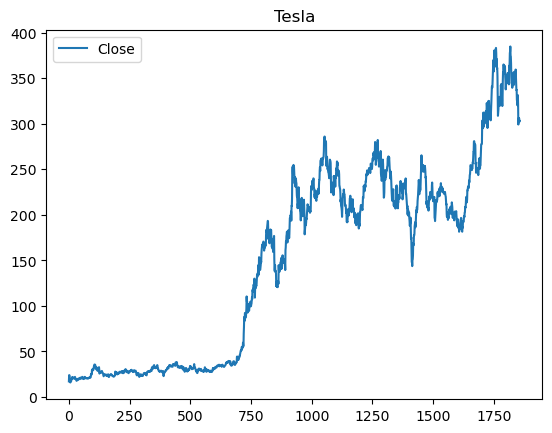

In [19]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Returns')

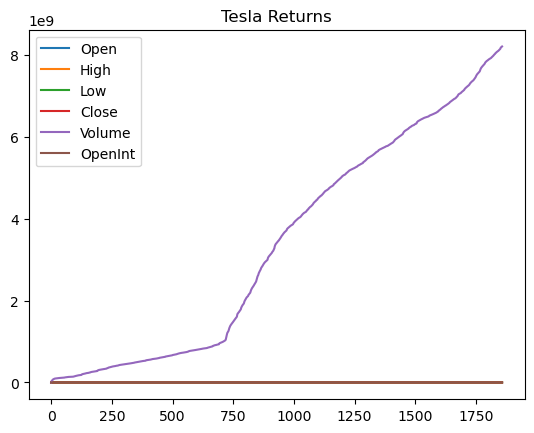

In [32]:
#Return
dr = df.cumsum()
dr.plot()
plt.title('Tesla Returns')

Text(0.5, 1.0, 'Tesla correlation')

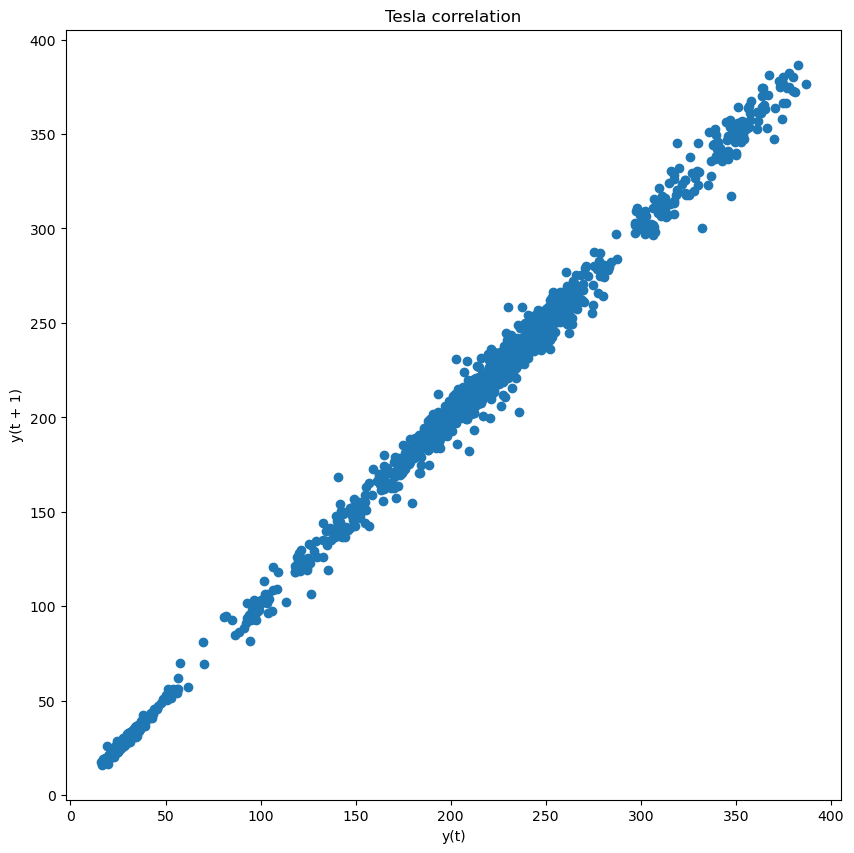

In [34]:
#autocorrelation plot
plt.figure(figsize=(10,10))
lag_plot(df['Open'])
plt.title('Tesla correlation')

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [54]:
df['Date'][1856]

'2017-11-09'

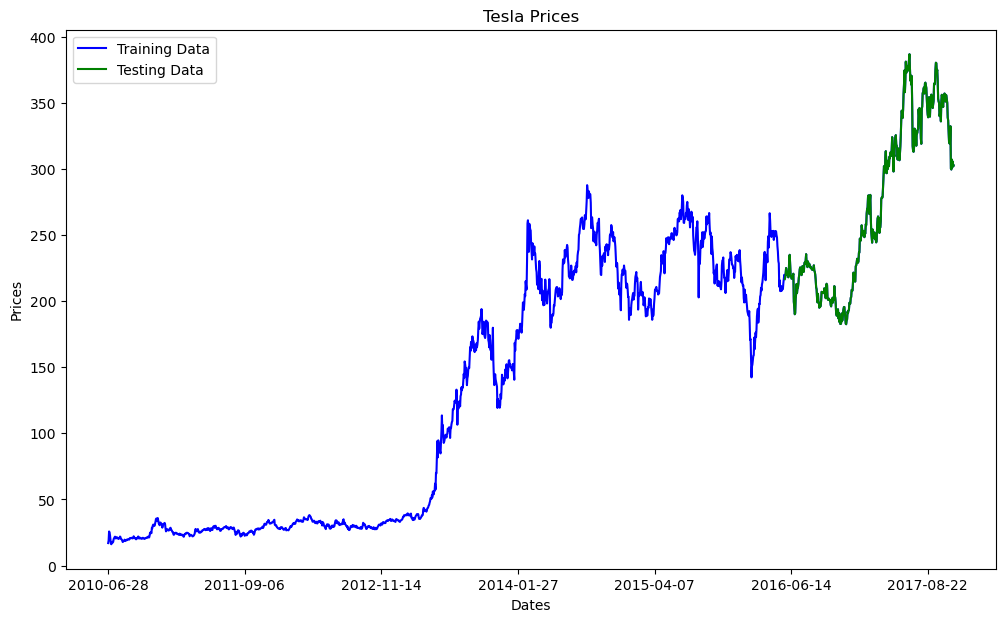

In [55]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1856, 300), df['Date'][0:1856:300])
plt.legend()

In [43]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [59]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)#MSE

<class 'list'>
Testing Mean Squared Error: 40.569


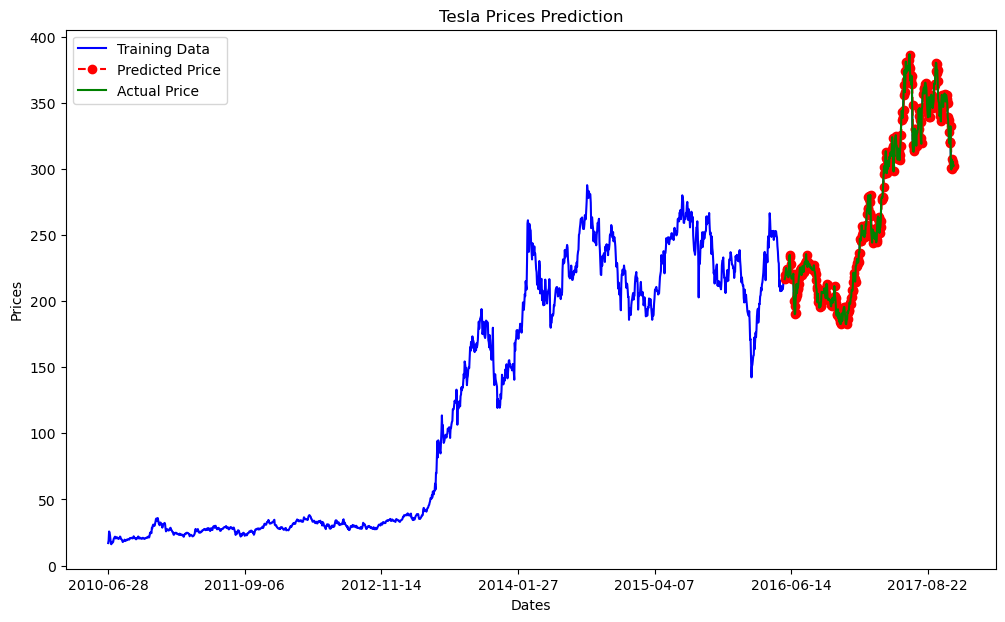

In [57]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='green', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1856, 300), df['Date'][0:1856:300])
plt.legend()

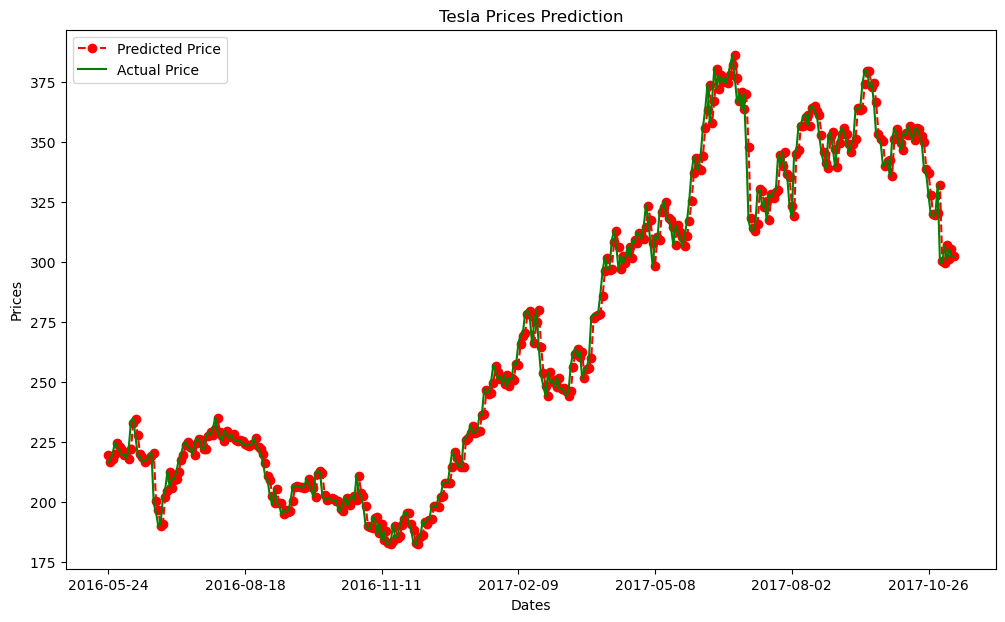

In [58]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='green', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()